<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/MNIST_convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [4]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [72]:
from keras import layers
from keras import models
convNN = models.Sequential()

In [73]:
convNN.add(layers.Conv2D(filters     =256, 
                         kernel_size =3, 
                         activation  ='relu', 
                         input_shape =(28, 28, 1)))
convNN.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=10, kernel_size=2, activation='softmax'))




In [74]:
convNN.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (None, 26, 26, 256)       2560      
                                                                 
 conv2d_167 (Conv2D)         (None, 24, 24, 256)       590080    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_168 (Conv2D)         (None, 10, 10, 128)       295040    
                                                                 
 conv2d_169 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 conv2d_170 (Conv2D)         (None, 6, 6, 64)          73792     
                                                     

In [75]:
keras.layers.Flatten(data_format=None)
convNN.add(layers.Flatten())

In [76]:
convNN.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (None, 26, 26, 256)       2560      
                                                                 
 conv2d_167 (Conv2D)         (None, 24, 24, 256)       590080    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_168 (Conv2D)         (None, 10, 10, 128)       295040    
                                                                 
 conv2d_169 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 conv2d_170 (Conv2D)         (None, 6, 6, 64)          73792     
                                                     

In [77]:
convNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
import time
tic = time.time()

convNN.fit(x = train_images, 
           y = train_labels, 
           epochs    =2,
           batch_size=64,
           verbose=2)

print('seconds=', time.time()-tic)

Epoch 1/2
938/938 - 21s - loss: 0.1462 - accuracy: 0.9544 - 21s/epoch - 22ms/step
Epoch 2/2
938/938 - 21s - loss: 0.0439 - accuracy: 0.9869 - 21s/epoch - 22ms/step
seconds= 82.69031643867493


In [79]:
test_loss, test_acc = convNN.evaluate(test_images, test_labels)
print('Accuracy:' ,test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.0297 - accuracy: 0.9915
Accuracy: 0.9915000200271606 , Otro WOW!


In [83]:
test_acc

0.9915000200271606

In [104]:
import numpy as np

test_predicted_labels = convNN.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

313/313 [==============================] - 1s 5ms/step


array([9.2232805e-11, 1.1190928e-10, 6.3739883e-08, 1.4686039e-09,
       3.1856011e-08, 2.3521271e-10, 2.2334229e-14, 9.9999940e-01,
       5.9677037e-09, 4.3903077e-07], dtype=float32)

In [98]:
np.argmax(test_predicted_labels[0])

7

In [100]:
#test_labels son vectores canonicos.
precision=0
for i in range(10000):
    tag_t=np.argmax(test_labels[i])
    tag_pred=np.argmax(test_predicted_labels[i])
    if(tag_t==tag_pred):
        precision+=1
precision*=1/10000
print(precision)

0.9915


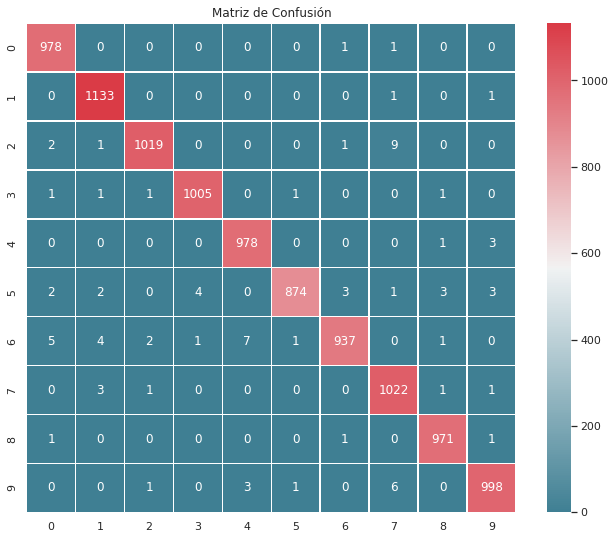

In [116]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 
C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()


In [115]:
accuracy = accuracy_score(test_true_labels, test_predicted_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_true_labels, test_predicted_labels,average='weighted')
print('Precision: %f',precision)
# recall: tp / (tp + fn)
recall = recall_score(test_true_labels, test_predicted_labels,average='weighted')
print('Recall: %f' , recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_true_labels, test_predicted_labels,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.991500
Precision: %f 0.9915280001734067
Recall: %f 0.9915
F1 score: 0.991492
